## 0 - Bibliotecas

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

## 1 - Tratamento dos Dados

In [3]:
data = pd.read_csv('./ecommerceDataset.csv', header=None)

data.columns = ['Category', 'Description']

print(data.head())


    Category                                        Description
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...


In [4]:
# Removendo pontuação e convertendo para minúsculas
data['cleaned_text'] = data['Description'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Exibindo as primeiras linhas para verificar o resultado
print(data[['Description', 'cleaned_text']].head())


                                         Description  \
0  Paper Plane Design Framed Wall Hanging Motivat...   
1  SAF 'Floral' Framed Painting (Wood, 30 inch x ...   
2  SAF 'UV Textured Modern Art Print Framed' Pain...   
3  SAF Flower Print Framed Painting (Synthetic, 1...   
4  Incredible Gifts India Wooden Happy Birthday U...   

                                        cleaned_text  
0  paper plane design framed wall hanging motivat...  
1  saf floral framed painting wood 30 inch x 10 i...  
2  saf uv textured modern art print framed painti...  
3  saf flower print framed painting synthetic 135...  
4  incredible gifts india wooden happy birthday u...  


In [5]:
# Baixar pacotes necessários
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eduar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Definir as stopwords em inglês
custom_stop_words = set(stopwords.words('english'))
custom_stop_words.update(['x', '1', 'also', 'product', 'one'])  # Adiciona "x" às stopwords

# Função para tokenizar e remover stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in custom_stop_words]
    return tokens

# Garantir que todos os valores na coluna 'cleaned_text' sejam strings
data['cleaned_text'] = data['cleaned_text'].astype(str)

# Preencher valores nulos com uma string vazia
data['cleaned_text'] = data['cleaned_text'].fillna('')

# Agora podemos aplicar a tokenização e remoção de stopwords
data['tokens'] = data['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Exibindo as primeiras linhas para verificar o resultado
print(data[['cleaned_text', 'tokens']].head())

                                        cleaned_text  \
0  paper plane design framed wall hanging motivat...   
1  saf floral framed painting wood 30 inch x 10 i...   
2  saf uv textured modern art print framed painti...   
3  saf flower print framed painting synthetic 135...   
4  incredible gifts india wooden happy birthday u...   

                                              tokens  
0  [paper, plane, design, framed, wall, hanging, ...  
1  [saf, floral, framed, painting, wood, 30, inch...  
2  [saf, uv, textured, modern, art, print, framed...  
3  [saf, flower, print, framed, painting, synthet...  
4  [incredible, gifts, india, wooden, happy, birt...  


In [7]:
# Divisão inicial em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], data['Category'], test_size=0.2, random_state=35)

# Dividindo ainda mais o conjunto de treino para criar um conjunto de validação (80% treino, 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=35)  # 0.25*0.8 = 0.2

# Exibindo o tamanho de cada conjunto
print(f"Tamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treinamento: 30255
Tamanho do conjunto de validação: 10085
Tamanho do conjunto de teste: 10085


## 2 - exploração

In [8]:
# Contagem de instâncias por classe (categoria)
class_counts = data['Category'].value_counts()

# Exibindo a contagem de cada classe
print("Contagem de classes:")
print(class_counts)


Contagem de classes:
Category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [9]:
# Calculando o comprimento de cada descrição em termos de número de tokens
data['text_length'] = data['tokens'].apply(len)

# Exibindo estatísticas descritivas sobre o comprimento dos textos
print("Estatísticas descritivas sobre o comprimento dos textos:")
print(data['text_length'].describe())

Estatísticas descritivas sobre o comprimento dos textos:
count    50425.000000
mean        74.449420
std         91.731621
min          1.000000
25%         26.000000
50%         52.000000
75%         98.000000
max       4504.000000
Name: text_length, dtype: float64


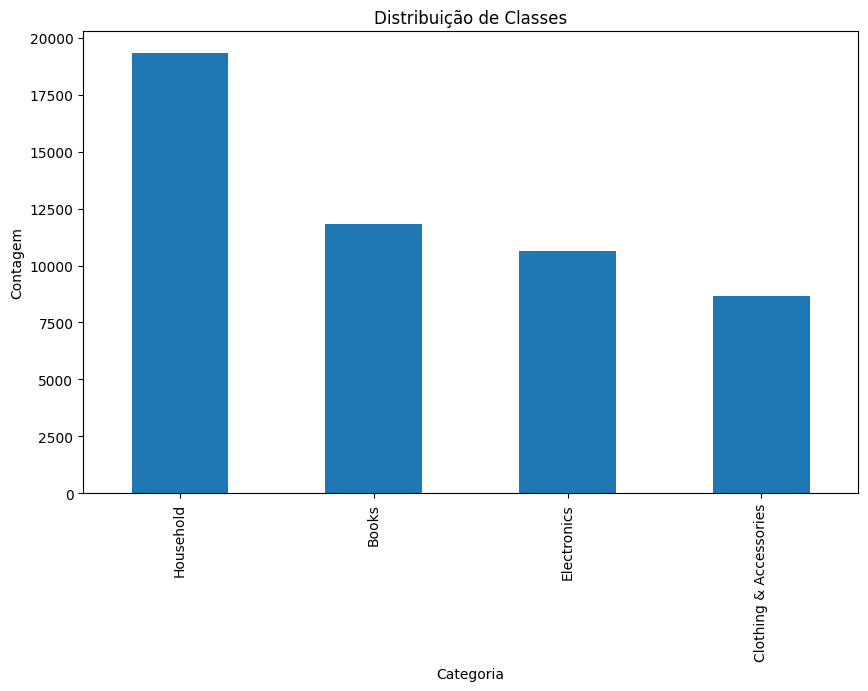

In [10]:
# Visualizando a distribuição das classes
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribuição de Classes')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [11]:
# Juntando todos os tokens em uma única lista
all_tokens = [token for tokens in data['tokens'] for token in tokens]

# Calculando a frequência das palavras
word_freq = Counter(all_tokens)

# Exibindo as 10 palavras mais comuns
print("10 palavras mais comuns:")
print(word_freq.most_common(10))

10 palavras mais comuns:
[('book', 12317), ('use', 11834), ('set', 11796), ('easy', 11239), ('quality', 11099), ('made', 10484), ('design', 10117), ('size', 10069), ('home', 9824), ('author', 9736)]


In [12]:
# Agrupando dados por categoria e visualizando algumas amostras
grouped_data = data.groupby('Category')['cleaned_text'].apply(list)

# Exibindo algumas amostras de cada categoria
for category, texts in grouped_data.items():
    print(f"\nCategoria: {category}")
    print(f"Exemplo de descrições: {texts[:2]}")  # Exibe duas descrições por categoria


Categoria: Books
Exemplo de descrições: ['inner engineering a yogis guide to joy about the author sadhguru jaggi vasudevsadhguru is a yogi mystic and visionary who established the isha foundation a nonprofit dedicated to the cultivation of human potential he belongs to no particular tradition and his scientific methods for selftransformation have universal appeal sadhguru has been an inuential voice at global forums including the united nations and the world economic forum he is the author of inner engineering spiegel  grau 2016 and makes his residence in india and tennessee for more visit innerengineeringcomsadhguru jaggi vasudevsadhguru is a yogi mystic and visionary who established the isha foundation a nonprofit dedicated to the cultivation of human potential he belongs to no particular tradition and his scientific methods for selftransformation have universal appeal sadhguru has been an inuential voice at global forums including the united nations and the world economic forum he 

## 3 - Modelo Baseline

### Bag of words

In [13]:
# Criando um vetor de contagem de palavras (Bag-of-Words)
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train.apply(lambda x: ' '.join(x)))  # Transformando lista de tokens em string
X_val_bow = vectorizer_bow.transform(X_val.apply(lambda x: ' '.join(x)))
X_test_bow = vectorizer_bow.transform(X_test.apply(lambda x: ' '.join(x)))

# Exibindo a forma da matriz resultante
print(f"Forma da matriz Bag-of-Words: {X_train_bow.shape}")

Forma da matriz Bag-of-Words: (30255, 95952)


### TF-IDF

In [14]:
# Criando um vetor de TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train.apply(lambda x: ' '.join(x)))  # Transformando lista de tokens em string
X_val_tfidf = vectorizer_tfidf.transform(X_val.apply(lambda x: ' '.join(x)))
X_test_tfidf = vectorizer_tfidf.transform(X_test.apply(lambda x: ' '.join(x)))

# Exibindo a forma da matriz resultante
print(f"Forma da matriz TF-IDF: {X_train_tfidf.shape}")

Forma da matriz TF-IDF: (30255, 95952)


### Naive Bayes

In [15]:
# Treinando o modelo Naive Bayes com Bag-of-Words
model_nb_bow = MultinomialNB()
model_nb_bow.fit(X_train_bow, y_train)

# Fazendo previsões no conjunto de validação
y_pred_val_bow = model_nb_bow.predict(X_val_bow)

# Avaliação do modelo Naive Bayes com Bag-of-Words
accuracy_bow = accuracy_score(y_val, y_pred_val_bow)
precision_bow = precision_score(y_val, y_pred_val_bow, average='weighted')
recall_bow = recall_score(y_val, y_pred_val_bow, average='weighted')

print("Desempenho do modelo Naive Bayes com Bag-of-Words:")
print(f"Acurácia: {accuracy_bow}")
print(f"Precisão: {precision_bow}")
print(f"Recall: {recall_bow}")

Desempenho do modelo Naive Bayes com Bag-of-Words:
Acurácia: 0.9528011898859693
Precisão: 0.9530192347427643
Recall: 0.9528011898859693


### Logistic Regression

In [16]:
# Treinando o modelo Logistic Regression com TF-IDF
model_lr_tfidf = LogisticRegression(max_iter=1000)
model_lr_tfidf.fit(X_train_tfidf, y_train)

# Fazendo previsões no conjunto de validação
y_pred_val_tfidf = model_lr_tfidf.predict(X_val_tfidf)

# Avaliação do modelo Logistic Regression com TF-IDF
accuracy_tfidf = accuracy_score(y_val, y_pred_val_tfidf)
precision_tfidf = precision_score(y_val, y_pred_val_tfidf, average='weighted')
recall_tfidf = recall_score(y_val, y_pred_val_tfidf, average='weighted')

print("Desempenho do modelo Logistic Regression com TF-IDF:")
print(f"Acurácia: {accuracy_tfidf}")
print(f"Precisão: {precision_tfidf}")
print(f"Recall: {recall_tfidf}")


In [ ]:
# Calculando AUC-ROC para Naive Bayes com Bag-of-Words
roc_auc_bow = roc_auc_score(y_val, model_nb_bow.predict_proba(X_val_bow), multi_class='ovr')

print(f"AUC-ROC para Naive Bayes com Bag-of-Words: {roc_auc_bow}")

# Calculando AUC-ROC para Logistic Regression com TF-IDF
roc_auc_tfidf = roc_auc_score(y_val, model_lr_tfidf.predict_proba(X_val_tfidf), multi_class='ovr')

print(f"AUC-ROC para Logistic Regression com TF-IDF: {roc_auc_tfidf}")


AUC-ROC para Naive Bayes com Bag-of-Words: 0.9841170629853995
AUC-ROC para Logistic Regression com TF-IDF: 0.9947759122650979


### 4 - Modelos Avançados

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
from langchain import LLMChain
from sklearn.preprocessing import LabelEncoder

In [ ]:
# BERT
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Carregar o modelo BERT pré-treinado para classificação de sequências
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(data['Category'].unique()))

# Preparar os dados para o modelo BERT
def tokenize_function(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')

# Classe personalizada para o Dataset
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Aqui convertemos para LongTensor
        return item

# Tokenizar os textos
X_train_encodings = tokenizer(X_train.apply(lambda x: ' '.join(x)).tolist(), padding='max_length', truncation=True, max_length=128, return_tensors='pt')
X_val_encodings = tokenizer(X_val.apply(lambda x: ' '.join(x)).tolist(), padding='max_length', truncation=True, max_length=128, return_tensors='pt')
X_test_encodings = tokenizer(X_test.apply(lambda x: ' '.join(x)).tolist(), padding='max_length', truncation=True, max_length=128, return_tensors='pt')

# Criando os datasets personalizados com os rótulos codificados
train_dataset = CustomDataset(X_train_encodings, y_train_encoded)
val_dataset = CustomDataset(X_val_encodings, y_val_encoded)

# Definir o Trainer do Huggingface para treinamento
training_args = TrainingArguments(
    output_dir='./results',          # Diretório para salvar os resultados
    num_train_epochs=3,              # Número de épocas
    per_device_train_batch_size=8,   # Tamanho do lote por dispositivo (GPU/CPU)
    per_device_eval_batch_size=16,   # Tamanho do lote de avaliação
    warmup_steps=500,                # Número de passos para aquecimento
    weight_decay=0.01,               # Decaimento de peso
    logging_dir='./logs',            # Diretório para logs
    logging_steps=10,
)

trainer = Trainer(
    model=model,                         # O modelo BERT
    args=training_args,                  # Argumentos de treinamento
    train_dataset=train_dataset,         # Dados de treinamento
    eval_dataset=val_dataset,            # Dados de validação
)

# Treinando o modelo
trainer.train()

# Avaliação no conjunto de validação
eval_results = trainer.evaluate()
print(f"Resultados da avaliação: {eval_results}")


c:\Users\eduar\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renam

  0%|          | 0/11346 [00:00<?, ?it/s]

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\4064288429.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 1.5198, 'grad_norm': 9.228694915771484, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0}
{'loss': 1.492, 'grad_norm': 9.310762405395508, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.01}
{'loss': 1.4398, 'grad_norm': 7.498249530792236, 'learning_rate': 3e-06, 'epoch': 0.01}
{'loss': 1.3845, 'grad_norm': 7.429069519042969, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.01}
{'loss': 1.3425, 'grad_norm': 6.678196907043457, 'learning_rate': 5e-06, 'epoch': 0.01}


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Codificação dos rótulos usando LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Carregar o modelo DistilBERT pré-treinado para classificação de sequências
model_name = 'distilbert-base-uncased'  # Usando DistilBERT para treinamento mais rápido
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(data['Category'].unique()))

# Preparar os dados para o modelo DistilBERT
def tokenize_function(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=64, return_tensors='pt')  # Reduzido o max_length para 64

# Classe personalizada para o Dataset
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Converte para LongTensor
        return item

# Tokenizar os textos
X_train_encodings = tokenizer(X_train.apply(lambda x: ' '.join(x)).tolist(), padding='max_length', truncation=True, max_length=64, return_tensors='pt')
X_val_encodings = tokenizer(X_val.apply(lambda x: ' '.join(x)).tolist(), padding='max_length', truncation=True, max_length=64, return_tensors='pt')
X_test_encodings = tokenizer(X_test.apply(lambda x: ' '.join(x)).tolist(), padding='max_length', truncation=True, max_length=64, return_tensors='pt')

# Criando os datasets personalizados com os rótulos codificados
train_dataset = CustomDataset(X_train_encodings, y_train_encoded)
val_dataset = CustomDataset(X_val_encodings, y_val_encoded)

# Definir o Trainer do Huggingface para treinamento
training_args = TrainingArguments(
    output_dir='./results',          # Diretório para salvar os resultados
    num_train_epochs=2,              # Número de épocas reduzido para 2
    per_device_train_batch_size=8,   # Tamanho do lote por dispositivo (GPU/CPU)
    per_device_eval_batch_size=16,   # Tamanho do lote de avaliação
    warmup_steps=500,                # Número de passos para aquecimento
    weight_decay=0.01,               # Decaimento de peso
    logging_dir='./logs',            # Diretório para logs
    logging_steps=10,
    fp16=True,                       # Ativar precisão mista para acelerar em GPUs compatíveis
)

trainer = Trainer(
    model=model,                         # O modelo DistilBERT
    args=training_args,                  # Argumentos de treinamento
    train_dataset=train_dataset,         # Dados de treinamento
    eval_dataset=val_dataset,            # Dados de validação
)

# Treinando o modelo
trainer.train()

# Avaliação no conjunto de validação
eval_results = trainer.evaluate()
print(f"Resultados da avaliação: {eval_results}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\eduar\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\eduar\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
c:\Users\eduar\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerN

  0%|          | 0/7564 [00:00<?, ?it/s]

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 1.3446, 'grad_norm': 9.775323867797852, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0}
{'loss': 1.3413, 'grad_norm': 17.582576751708984, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.01}
{'loss': 1.3686, 'grad_norm': 8.922935485839844, 'learning_rate': 3e-06, 'epoch': 0.01}
{'loss': 1.3805, 'grad_norm': 10.681228637695312, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.01}
{'loss': 1.375, 'grad_norm': 10.72651195526123, 'learning_rate': 5e-06, 'epoch': 0.01}
{'loss': 1.2939, 'grad_norm': 10.95237922668457, 'learning_rate': 6e-06, 'epoch': 0.02}
{'loss': 1.4404, 'grad_norm': 12.402175903320312, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.02}
{'loss': 1.415, 'grad_norm': 11.784027099609375, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.02}
{'loss': 1.3356, 'grad_norm': 9.709861755371094, 'learning_rate': 9e-06, 'epoch': 0.02}
{'loss': 1.2569, 'grad_norm': 5.5762939453125, 'learning_rate': 1e-05, 'epoch': 0.03}
{'loss': 1.4106, 'grad_norm': 6.0843544

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6201, 'grad_norm': 50.9267463684082, 'learning_rate': 4.992921857304643e-05, 'epoch': 0.13}
{'loss': 0.6834, 'grad_norm': 15.26224422454834, 'learning_rate': 4.9858437146092866e-05, 'epoch': 0.14}
{'loss': 0.9087, 'grad_norm': 65.18449401855469, 'learning_rate': 4.9787655719139295e-05, 'epoch': 0.14}
{'loss': 0.7542, 'grad_norm': 5.834545135498047, 'learning_rate': 4.971687429218573e-05, 'epoch': 0.14}
{'loss': 0.8892, 'grad_norm': 54.874656677246094, 'learning_rate': 4.9646092865232165e-05, 'epoch': 0.15}
{'loss': 0.5551, 'grad_norm': 11.23776912689209, 'learning_rate': 4.95753114382786e-05, 'epoch': 0.15}
{'loss': 0.6815, 'grad_norm': 37.54221725463867, 'learning_rate': 4.950453001132503e-05, 'epoch': 0.15}
{'loss': 0.5513, 'grad_norm': 22.465438842773438, 'learning_rate': 4.9433748584371465e-05, 'epoch': 0.15}
{'loss': 0.5146, 'grad_norm': 27.204214096069336, 'learning_rate': 4.936296715741789e-05, 'epoch': 0.16}
{'loss': 0.504, 'grad_norm': 27.83167839050293, 'learning_r

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.5986, 'grad_norm': 0.7078990936279297, 'learning_rate': 4.639014722536806e-05, 'epoch': 0.27}
{'loss': 0.5079, 'grad_norm': 13.602083206176758, 'learning_rate': 4.6319365798414496e-05, 'epoch': 0.27}
{'loss': 0.818, 'grad_norm': 53.54669952392578, 'learning_rate': 4.624858437146093e-05, 'epoch': 0.27}
{'loss': 0.4712, 'grad_norm': 37.995243072509766, 'learning_rate': 4.617780294450737e-05, 'epoch': 0.27}
{'loss': 0.3303, 'grad_norm': 19.055198669433594, 'learning_rate': 4.6107021517553795e-05, 'epoch': 0.28}
{'loss': 0.3445, 'grad_norm': 0.7253249883651733, 'learning_rate': 4.603624009060023e-05, 'epoch': 0.28}
{'loss': 0.4604, 'grad_norm': 0.2139139324426651, 'learning_rate': 4.596545866364666e-05, 'epoch': 0.28}
{'loss': 0.493, 'grad_norm': 21.463245391845703, 'learning_rate': 4.5894677236693094e-05, 'epoch': 0.29}
{'loss': 0.6021, 'grad_norm': 92.06228637695312, 'learning_rate': 4.582389580973952e-05, 'epoch': 0.29}
{'loss': 0.4783, 'grad_norm': 13.55153751373291, 'learni

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.4669, 'grad_norm': 34.02079391479492, 'learning_rate': 4.28510758776897e-05, 'epoch': 0.4}
{'loss': 0.4961, 'grad_norm': 15.081598281860352, 'learning_rate': 4.278029445073613e-05, 'epoch': 0.4}
{'loss': 0.2658, 'grad_norm': 1.4137259721755981, 'learning_rate': 4.270951302378256e-05, 'epoch': 0.4}
{'loss': 0.3668, 'grad_norm': 1.023970603942871, 'learning_rate': 4.2638731596829e-05, 'epoch': 0.41}
{'loss': 0.4897, 'grad_norm': 147.7849884033203, 'learning_rate': 4.2567950169875425e-05, 'epoch': 0.41}
{'loss': 0.4531, 'grad_norm': 73.19483947753906, 'learning_rate': 4.249716874292186e-05, 'epoch': 0.41}
{'loss': 0.1597, 'grad_norm': 3.6044368743896484, 'learning_rate': 4.242638731596829e-05, 'epoch': 0.42}
{'loss': 0.5558, 'grad_norm': 207.327392578125, 'learning_rate': 4.2355605889014724e-05, 'epoch': 0.42}
{'loss': 0.5299, 'grad_norm': 84.37837982177734, 'learning_rate': 4.228482446206116e-05, 'epoch': 0.42}
{'loss': 0.2441, 'grad_norm': 0.17625030875205994, 'learning_rate'

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.169, 'grad_norm': 0.1054735854268074, 'learning_rate': 3.931200453001133e-05, 'epoch': 0.53}
{'loss': 0.2185, 'grad_norm': 0.09062626957893372, 'learning_rate': 3.924122310305776e-05, 'epoch': 0.53}
{'loss': 0.3652, 'grad_norm': 103.51316833496094, 'learning_rate': 3.917044167610419e-05, 'epoch': 0.54}
{'loss': 0.5206, 'grad_norm': 14.529224395751953, 'learning_rate': 3.9099660249150627e-05, 'epoch': 0.54}
{'loss': 0.4214, 'grad_norm': 3.6054282188415527, 'learning_rate': 3.9028878822197055e-05, 'epoch': 0.54}
{'loss': 0.3651, 'grad_norm': 10.151164054870605, 'learning_rate': 3.895809739524349e-05, 'epoch': 0.54}
{'loss': 0.2915, 'grad_norm': 92.3759994506836, 'learning_rate': 3.8887315968289926e-05, 'epoch': 0.55}
{'loss': 0.2797, 'grad_norm': 85.5000228881836, 'learning_rate': 3.881653454133636e-05, 'epoch': 0.55}
{'loss': 0.337, 'grad_norm': 0.19369475543498993, 'learning_rate': 3.874575311438279e-05, 'epoch': 0.55}
{'loss': 0.2562, 'grad_norm': 0.939833402633667, 'learni

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.4597, 'grad_norm': 0.38213208317756653, 'learning_rate': 3.577293318233296e-05, 'epoch': 0.66}
{'loss': 0.3865, 'grad_norm': 112.63909912109375, 'learning_rate': 3.570215175537939e-05, 'epoch': 0.67}
{'loss': 0.1696, 'grad_norm': 0.07081159949302673, 'learning_rate': 3.563137032842582e-05, 'epoch': 0.67}
{'loss': 0.2674, 'grad_norm': 128.86378479003906, 'learning_rate': 3.556058890147225e-05, 'epoch': 0.67}
{'loss': 0.1897, 'grad_norm': 81.12857818603516, 'learning_rate': 3.5489807474518685e-05, 'epoch': 0.67}
{'loss': 0.5328, 'grad_norm': 7.521778583526611, 'learning_rate': 3.541902604756512e-05, 'epoch': 0.68}
{'loss': 0.1611, 'grad_norm': 0.14711424708366394, 'learning_rate': 3.5348244620611556e-05, 'epoch': 0.68}
{'loss': 0.2165, 'grad_norm': 0.11345337331295013, 'learning_rate': 3.5277463193657984e-05, 'epoch': 0.68}
{'loss': 0.4086, 'grad_norm': 23.654624938964844, 'learning_rate': 3.520668176670442e-05, 'epoch': 0.68}
{'loss': 0.2112, 'grad_norm': 0.08550781011581421,

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2171, 'grad_norm': 0.11242467164993286, 'learning_rate': 3.223386183465459e-05, 'epoch': 0.8}
{'loss': 0.1027, 'grad_norm': 31.56453514099121, 'learning_rate': 3.2163080407701016e-05, 'epoch': 0.8}
{'loss': 0.4475, 'grad_norm': 0.08223351836204529, 'learning_rate': 3.209229898074745e-05, 'epoch': 0.8}
{'loss': 0.4011, 'grad_norm': 93.7540054321289, 'learning_rate': 3.2021517553793886e-05, 'epoch': 0.8}
{'loss': 0.424, 'grad_norm': 0.10516992211341858, 'learning_rate': 3.195073612684032e-05, 'epoch': 0.81}
{'loss': 0.5024, 'grad_norm': 0.1531337946653366, 'learning_rate': 3.187995469988675e-05, 'epoch': 0.81}
{'loss': 0.1703, 'grad_norm': 0.8517729043960571, 'learning_rate': 3.1809173272933185e-05, 'epoch': 0.81}
{'loss': 0.2995, 'grad_norm': 50.371150970458984, 'learning_rate': 3.1738391845979614e-05, 'epoch': 0.81}
{'loss': 0.2831, 'grad_norm': 0.1777825802564621, 'learning_rate': 3.166761041902605e-05, 'epoch': 0.82}
{'loss': 0.3349, 'grad_norm': 3.712249279022217, 'learni

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2592, 'grad_norm': 0.12169553339481354, 'learning_rate': 2.869479048697622e-05, 'epoch': 0.93}
{'loss': 0.2578, 'grad_norm': 24.55499839782715, 'learning_rate': 2.862400906002265e-05, 'epoch': 0.93}
{'loss': 0.3372, 'grad_norm': 32.249324798583984, 'learning_rate': 2.8553227633069084e-05, 'epoch': 0.93}
{'loss': 0.2179, 'grad_norm': 0.6708424091339111, 'learning_rate': 2.8482446206115516e-05, 'epoch': 0.94}
{'loss': 0.1358, 'grad_norm': 0.1330845206975937, 'learning_rate': 2.841166477916195e-05, 'epoch': 0.94}
{'loss': 0.5135, 'grad_norm': 3.844358205795288, 'learning_rate': 2.834088335220838e-05, 'epoch': 0.94}
{'loss': 0.1343, 'grad_norm': 0.16720378398895264, 'learning_rate': 2.8270101925254815e-05, 'epoch': 0.94}
{'loss': 0.127, 'grad_norm': 31.05569076538086, 'learning_rate': 2.8199320498301247e-05, 'epoch': 0.95}
{'loss': 0.3676, 'grad_norm': 0.10982341319322586, 'learning_rate': 2.8128539071347683e-05, 'epoch': 0.95}
{'loss': 0.0908, 'grad_norm': 0.2150111049413681, '

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2399, 'grad_norm': 44.143455505371094, 'learning_rate': 2.515571913929785e-05, 'epoch': 1.06}
{'loss': 0.251, 'grad_norm': 0.13803499937057495, 'learning_rate': 2.5084937712344282e-05, 'epoch': 1.06}
{'loss': 0.1511, 'grad_norm': 0.13990062475204468, 'learning_rate': 2.5014156285390718e-05, 'epoch': 1.07}
{'loss': 0.0127, 'grad_norm': 0.09318297356367111, 'learning_rate': 2.4943374858437146e-05, 'epoch': 1.07}
{'loss': 0.2275, 'grad_norm': 0.18259671330451965, 'learning_rate': 2.4872593431483578e-05, 'epoch': 1.07}
{'loss': 0.245, 'grad_norm': 0.09424556791782379, 'learning_rate': 2.4801812004530013e-05, 'epoch': 1.07}
{'loss': 0.1978, 'grad_norm': 28.327905654907227, 'learning_rate': 2.4731030577576445e-05, 'epoch': 1.08}
{'loss': 0.0737, 'grad_norm': 0.17814812064170837, 'learning_rate': 2.4660249150622877e-05, 'epoch': 1.08}
{'loss': 0.1829, 'grad_norm': 0.11550885438919067, 'learning_rate': 2.458946772366931e-05, 'epoch': 1.08}
{'loss': 0.301, 'grad_norm': 19.25031471252

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.0585, 'grad_norm': 0.2826750874519348, 'learning_rate': 2.161664779161948e-05, 'epoch': 1.19}
{'loss': 0.0517, 'grad_norm': 1.1967376470565796, 'learning_rate': 2.1545866364665912e-05, 'epoch': 1.2}
{'loss': 0.0395, 'grad_norm': 0.058425068855285645, 'learning_rate': 2.1475084937712344e-05, 'epoch': 1.2}
{'loss': 0.1322, 'grad_norm': 0.15344929695129395, 'learning_rate': 2.1404303510758776e-05, 'epoch': 1.2}
{'loss': 0.2099, 'grad_norm': 0.3169425427913666, 'learning_rate': 2.133352208380521e-05, 'epoch': 1.2}
{'loss': 0.1279, 'grad_norm': 0.08680717647075653, 'learning_rate': 2.1262740656851643e-05, 'epoch': 1.21}
{'loss': 0.2043, 'grad_norm': 0.042481113225221634, 'learning_rate': 2.1191959229898075e-05, 'epoch': 1.21}
{'loss': 0.1715, 'grad_norm': 0.05058853700757027, 'learning_rate': 2.1121177802944507e-05, 'epoch': 1.21}
{'loss': 0.247, 'grad_norm': 0.05905325338244438, 'learning_rate': 2.1050396375990942e-05, 'epoch': 1.21}
{'loss': 0.0034, 'grad_norm': 0.0514602735638

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2269, 'grad_norm': 0.4400140047073364, 'learning_rate': 1.807757644394111e-05, 'epoch': 1.32}
{'loss': 0.1386, 'grad_norm': 0.1962655484676361, 'learning_rate': 1.8006795016987542e-05, 'epoch': 1.33}
{'loss': 0.1209, 'grad_norm': 27.531333923339844, 'learning_rate': 1.7936013590033977e-05, 'epoch': 1.33}
{'loss': 0.1515, 'grad_norm': 13.159035682678223, 'learning_rate': 1.786523216308041e-05, 'epoch': 1.33}
{'loss': 0.2141, 'grad_norm': 0.07479595392942429, 'learning_rate': 1.779445073612684e-05, 'epoch': 1.34}
{'loss': 0.2549, 'grad_norm': 0.06746330112218857, 'learning_rate': 1.7723669309173273e-05, 'epoch': 1.34}
{'loss': 0.4004, 'grad_norm': 0.07479064166545868, 'learning_rate': 1.765288788221971e-05, 'epoch': 1.34}
{'loss': 0.2226, 'grad_norm': 0.1182858869433403, 'learning_rate': 1.758210645526614e-05, 'epoch': 1.34}
{'loss': 0.3436, 'grad_norm': 4.1043009757995605, 'learning_rate': 1.7511325028312572e-05, 'epoch': 1.35}
{'loss': 0.2405, 'grad_norm': 11.166295051574707

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.0052, 'grad_norm': 0.06966698914766312, 'learning_rate': 1.4538505096262742e-05, 'epoch': 1.46}
{'loss': 0.3086, 'grad_norm': 0.06350850313901901, 'learning_rate': 1.4467723669309175e-05, 'epoch': 1.46}
{'loss': 0.307, 'grad_norm': 30.48748207092285, 'learning_rate': 1.4396942242355607e-05, 'epoch': 1.46}
{'loss': 0.3006, 'grad_norm': 0.2513911724090576, 'learning_rate': 1.4326160815402039e-05, 'epoch': 1.46}
{'loss': 0.151, 'grad_norm': 3.8852767944335938, 'learning_rate': 1.4255379388448473e-05, 'epoch': 1.47}
{'loss': 0.2657, 'grad_norm': 0.12267719954252243, 'learning_rate': 1.4184597961494905e-05, 'epoch': 1.47}
{'loss': 0.1555, 'grad_norm': 0.08761293441057205, 'learning_rate': 1.4113816534541338e-05, 'epoch': 1.47}
{'loss': 0.2158, 'grad_norm': 0.07496004551649094, 'learning_rate': 1.404303510758777e-05, 'epoch': 1.48}
{'loss': 0.0304, 'grad_norm': 0.07517901808023453, 'learning_rate': 1.3972253680634204e-05, 'epoch': 1.48}
{'loss': 0.0669, 'grad_norm': 0.336642086505

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2832, 'grad_norm': 3.803710699081421, 'learning_rate': 1.0999433748584372e-05, 'epoch': 1.59}
{'loss': 0.1298, 'grad_norm': 0.10868300497531891, 'learning_rate': 1.0928652321630803e-05, 'epoch': 1.59}
{'loss': 0.2424, 'grad_norm': 0.0817987471818924, 'learning_rate': 1.0857870894677237e-05, 'epoch': 1.59}
{'loss': 0.161, 'grad_norm': 0.0749945119023323, 'learning_rate': 1.0787089467723669e-05, 'epoch': 1.6}
{'loss': 0.0041, 'grad_norm': 0.0958242267370224, 'learning_rate': 1.0716308040770103e-05, 'epoch': 1.6}
{'loss': 0.3795, 'grad_norm': 5.624824523925781, 'learning_rate': 1.0645526613816535e-05, 'epoch': 1.6}
{'loss': 0.0417, 'grad_norm': 0.11386783421039581, 'learning_rate': 1.0574745186862968e-05, 'epoch': 1.6}
{'loss': 0.2183, 'grad_norm': 0.054150380194187164, 'learning_rate': 1.05039637599094e-05, 'epoch': 1.61}
{'loss': 0.2322, 'grad_norm': 0.10991019755601883, 'learning_rate': 1.0433182332955834e-05, 'epoch': 1.61}
{'loss': 0.168, 'grad_norm': 0.14818820357322693, 

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.0797, 'grad_norm': 0.1976999044418335, 'learning_rate': 7.460362400906003e-06, 'epoch': 1.72}
{'loss': 0.219, 'grad_norm': 0.08414406329393387, 'learning_rate': 7.389580973952436e-06, 'epoch': 1.72}
{'loss': 0.1419, 'grad_norm': 0.0865490511059761, 'learning_rate': 7.318799546998868e-06, 'epoch': 1.73}
{'loss': 0.066, 'grad_norm': 0.19731761515140533, 'learning_rate': 7.2480181200453006e-06, 'epoch': 1.73}
{'loss': 0.0686, 'grad_norm': 0.07767587155103683, 'learning_rate': 7.177236693091733e-06, 'epoch': 1.73}
{'loss': 0.2702, 'grad_norm': 180.87501525878906, 'learning_rate': 7.106455266138165e-06, 'epoch': 1.73}
{'loss': 0.06, 'grad_norm': 110.27052307128906, 'learning_rate': 7.035673839184598e-06, 'epoch': 1.74}
{'loss': 0.2562, 'grad_norm': 0.08172260224819183, 'learning_rate': 6.964892412231031e-06, 'epoch': 1.74}
{'loss': 0.1413, 'grad_norm': 0.6473458409309387, 'learning_rate': 6.8941109852774636e-06, 'epoch': 1.74}
{'loss': 0.2744, 'grad_norm': 11.785198211669922, 'le

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.0627, 'grad_norm': 0.047569043934345245, 'learning_rate': 3.921291053227633e-06, 'epoch': 1.85}
{'loss': 0.1072, 'grad_norm': 0.04090407118201256, 'learning_rate': 3.850509626274066e-06, 'epoch': 1.86}
{'loss': 0.0862, 'grad_norm': 0.24344708025455475, 'learning_rate': 3.7797281993204985e-06, 'epoch': 1.86}
{'loss': 0.1344, 'grad_norm': 0.059452272951602936, 'learning_rate': 3.708946772366931e-06, 'epoch': 1.86}
{'loss': 0.2669, 'grad_norm': 0.106751948595047, 'learning_rate': 3.6381653454133636e-06, 'epoch': 1.86}
{'loss': 0.1209, 'grad_norm': 0.05449368804693222, 'learning_rate': 3.5673839184597964e-06, 'epoch': 1.87}
{'loss': 0.0937, 'grad_norm': 0.12965995073318481, 'learning_rate': 3.496602491506229e-06, 'epoch': 1.87}
{'loss': 0.0655, 'grad_norm': 6.505570411682129, 'learning_rate': 3.4258210645526615e-06, 'epoch': 1.87}
{'loss': 0.1428, 'grad_norm': 0.06451161950826645, 'learning_rate': 3.3550396375990943e-06, 'epoch': 1.87}
{'loss': 0.2259, 'grad_norm': 0.09031745791

C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.1522, 'grad_norm': 0.18492259085178375, 'learning_rate': 3.822197055492639e-07, 'epoch': 1.99}
{'loss': 0.0678, 'grad_norm': 0.08390216529369354, 'learning_rate': 3.114382785956965e-07, 'epoch': 1.99}
{'loss': 0.1554, 'grad_norm': 0.040347158908843994, 'learning_rate': 2.406568516421291e-07, 'epoch': 1.99}
{'loss': 0.0786, 'grad_norm': 0.06434008479118347, 'learning_rate': 1.6987542468856172e-07, 'epoch': 1.99}
{'loss': 0.0039, 'grad_norm': 0.057423919439315796, 'learning_rate': 9.909399773499434e-08, 'epoch': 2.0}
{'loss': 0.1146, 'grad_norm': 0.12768225371837616, 'learning_rate': 2.8312570781426955e-08, 'epoch': 2.0}
{'train_runtime': 29141.9577, 'train_samples_per_second': 2.076, 'train_steps_per_second': 0.26, 'train_loss': 0.3215934074575417, 'epoch': 2.0}


C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


  0%|          | 0/631 [00:00<?, ?it/s]

Resultados da avaliação: {'eval_loss': 0.18532148003578186, 'eval_runtime': 1262.057, 'eval_samples_per_second': 7.991, 'eval_steps_per_second': 0.5, 'epoch': 2.0}


In [ ]:
# Descrição do novo produto
new_product_description = "65w"


# Tokenizar a descrição do novo produto
new_product_encoding = tokenizer(
    new_product_description,
    padding='max_length', 
    truncation=True, 
    max_length=64,  # O mesmo max_length usado no treinamento
    return_tensors='pt'  # Retorna os tensores PyTorch
)

# Fazer a previsão
with torch.no_grad():
    outputs = model(**new_product_encoding)  # Passa o dicionário de tensores
    logits = outputs.logits
    predicted_class_id = logits.argmax(-1).item()

# Converter o ID previsto de volta para a categoria original
predicted_category = label_encoder.inverse_transform([predicted_class_id])[0]

print(f"A categoria prevista para o produto é: {predicted_category}")


NameError: name 'tokenizer' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Gerar previsões no conjunto de validação
predictions = trainer.predict(val_dataset)

# Extrair os rótulos reais e as previsões
labels = predictions.label_ids
preds = predictions.predictions.argmax(-1)

# Calcular as métricas
accuracy = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

# Exibir os resultados
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


C:\Users\eduar\AppData\Local\Temp\ipykernel_14848\2535118374.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


KeyboardInterrupt: 